In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('appa_data_26-07-2022.csv', encoding='windows-1252')
df.head()

,Stazione,Inquinante,Data,Ora,Valore,Unità di misura
0,Parco S. Chiara,PM10,2022-06-26,1,18,µg/mc
1,Parco S. Chiara,PM10,2022-06-26,2,17,µg/mc
2,Parco S. Chiara,PM10,2022-06-26,3,17,µg/mc
3,Parco S. Chiara,PM10,2022-06-26,4,16,µg/mc
4,Parco S. Chiara,PM10,2022-06-26,5,17,µg/mc


In [3]:
df.loc[df["Ora"] == 24, "Ora"] = 00
df["Ora"] = df["Ora"].astype(str).str.zfill(2)
df["Data-Ora"] = pd.to_datetime(df["Data"] + " " + df["Ora"], format="%Y-%m-%d %H")

df

,Stazione,Inquinante,Data,Ora,Valore,Unità di misura,Data-Ora
0,Parco S. Chiara,PM10,2022-06-26,01,18,µg/mc,2022-06-26 01:00:00
1,Parco S. Chiara,PM10,2022-06-26,02,17,µg/mc,2022-06-26 02:00:00
2,Parco S. Chiara,PM10,2022-06-26,03,17,µg/mc,2022-06-26 03:00:00
3,Parco S. Chiara,PM10,2022-06-26,04,16,µg/mc,2022-06-26 04:00:00
4,Parco S. Chiara,PM10,2022-06-26,05,17,µg/mc,2022-06-26 05:00:00
...,...,...,...,...,...,...,...
20559,Monte Gaza,Ozono,2022-07-26,20,155,µg/mc,2022-07-26 20:00:00
20560,Monte Gaza,Ozono,2022-07-26,21,148,µg/mc,2022-07-26 21:00:00
20561,Monte Gaza,Ozono,2022-07-26,22,137,µg/mc,2022-07-26 22:00:00
20562,Monte Gaza,Ozono,2022-07-26,23,126,µg/mc,2022-07-26 23:00:00


In [21]:
station_data = {}

for station in df.Stazione.unique():
    # copy the main dataFrame and take only the desired station
    temp_df = df.copy()[df.Stazione == station]

    # remove columns station name, date, hour and unit of measure
    temp_df.drop(["Stazione", "Data", "Ora", "Unità di misura"], axis=1, inplace=True)

    # Take the "Data-Ora" column and use it as an unique identifier
    # then take all the unique values of "Inquinante" column and add it
    # as columns to the table, finally fill those columns with the data
    # found in the "Valore" column
    # This operation raises a warn and I don't know why
    temp_df = pd.pivot_table(
        temp_df,
        index   = "Data-Ora",
        columns = "Inquinante",
        values  = "Valore",
        fill_value = -1
    )
    # add the single station data to the station_data dict
    station_data[station] = temp_df

temp_df

/tmp/ipykernel_5950/1584382292.py:15: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  temp_df = pd.pivot_table(


Inquinante,Biossido di Azoto,Ozono,PM10
Data-Ora,,,
2022-06-26 00:00:00,4,120,20
2022-06-26 01:00:00,5,123,9
2022-06-26 02:00:00,5,123,10
2022-06-26 03:00:00,4,124,10
2022-06-26 04:00:00,4,125,11
...,...,...,...
2022-07-26 19:00:00,7,158,13
2022-07-26 20:00:00,7,155,14
2022-07-26 21:00:00,7,148,15


Stazione Parco S. Chiara


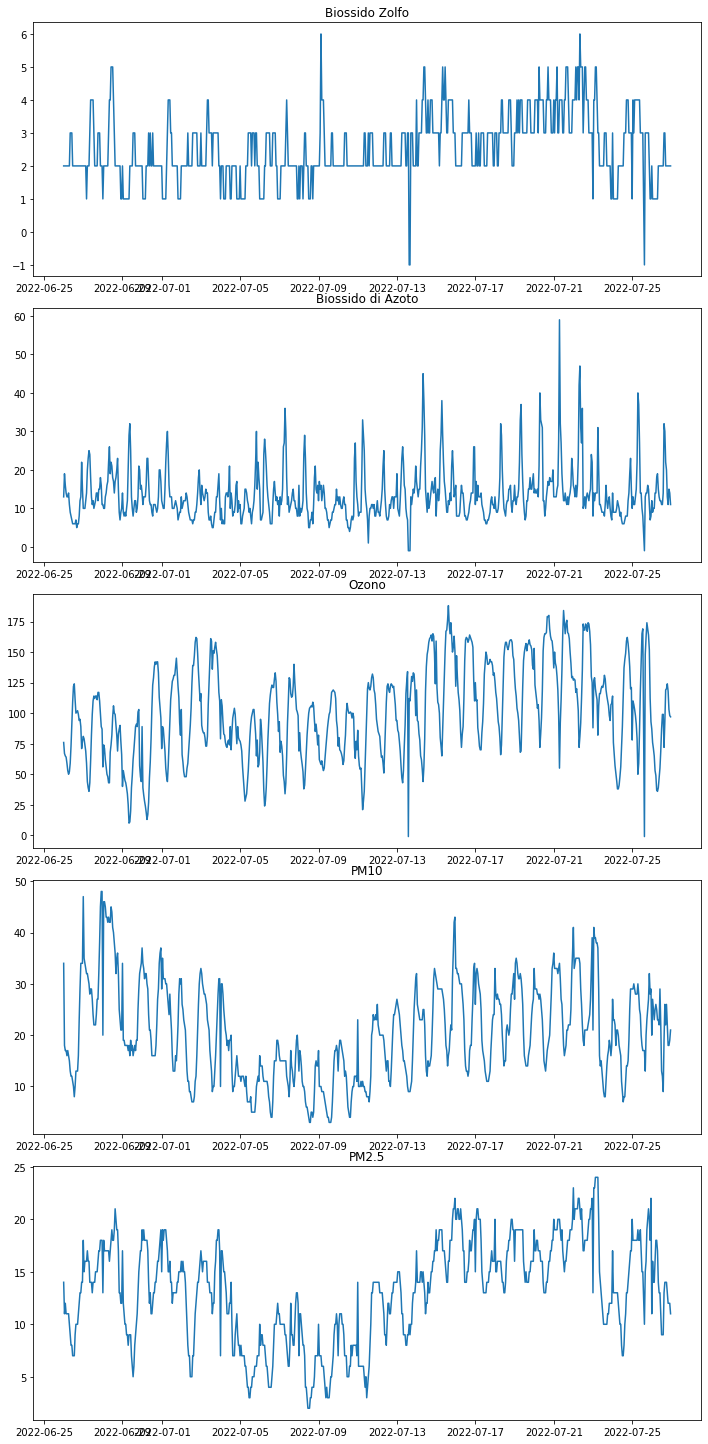

Stazione Via Bolzano


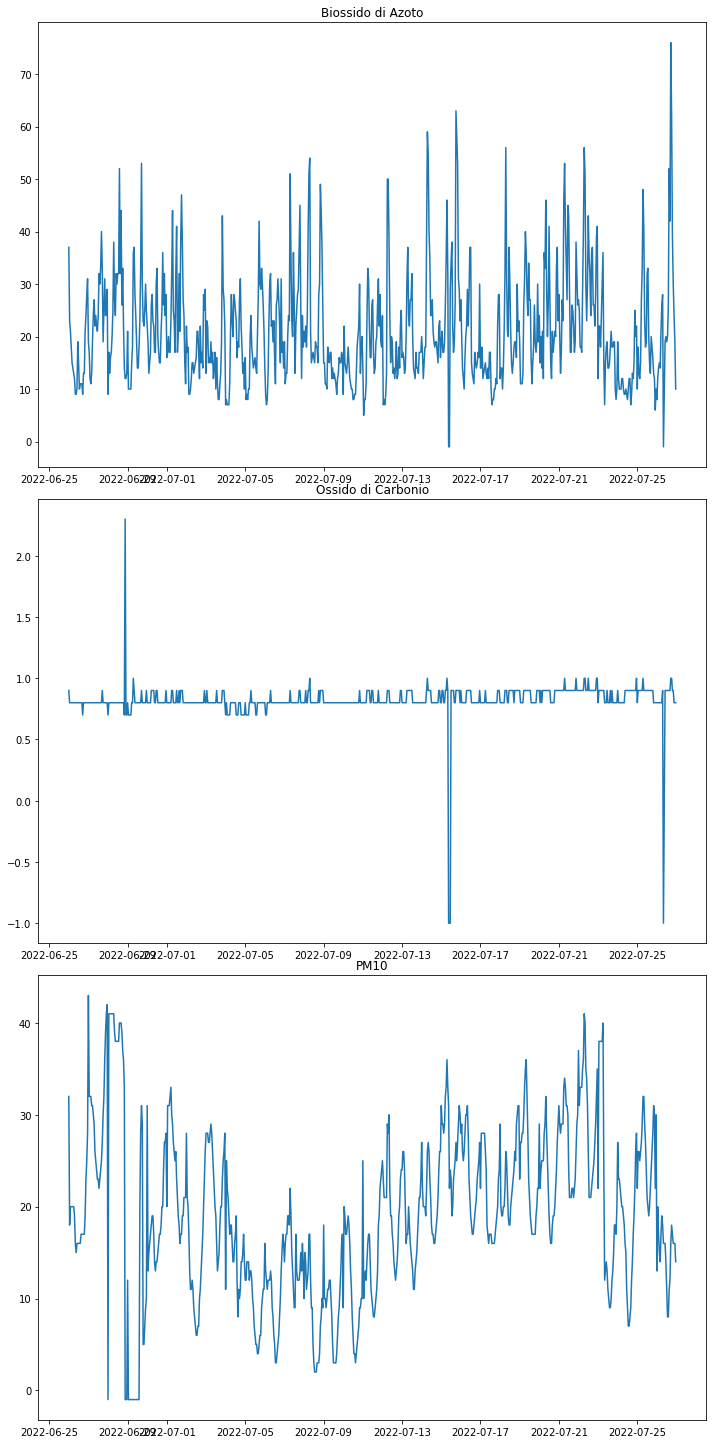

Stazione Piana Rotaliana


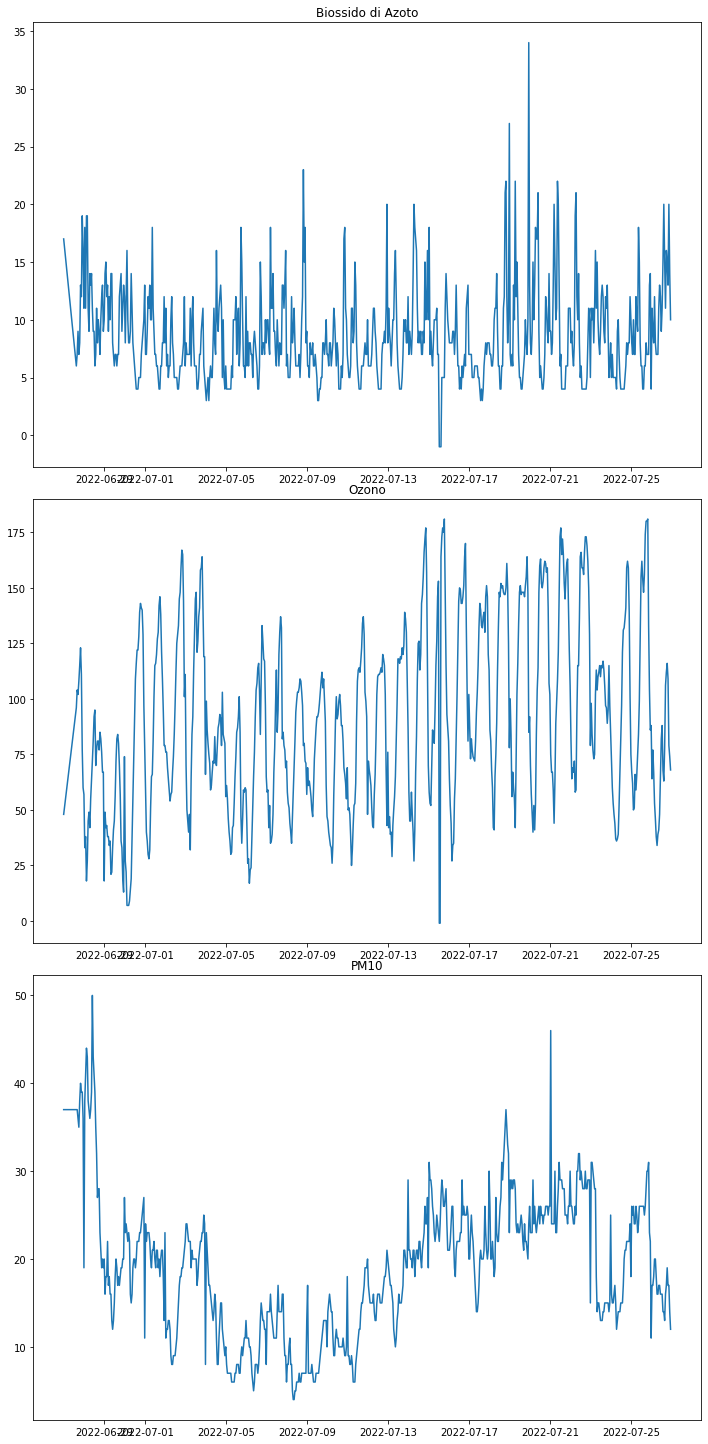

Stazione Rovereto


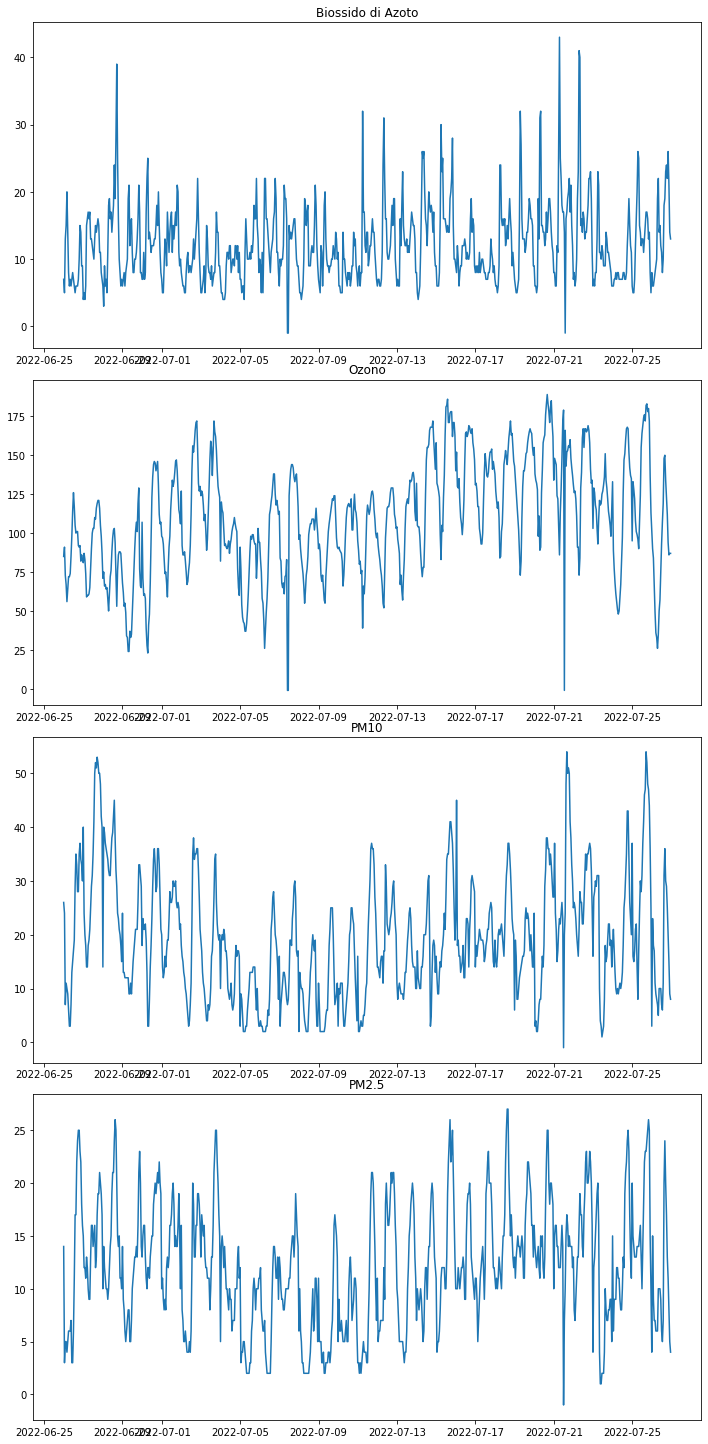

Stazione Riva del Garda


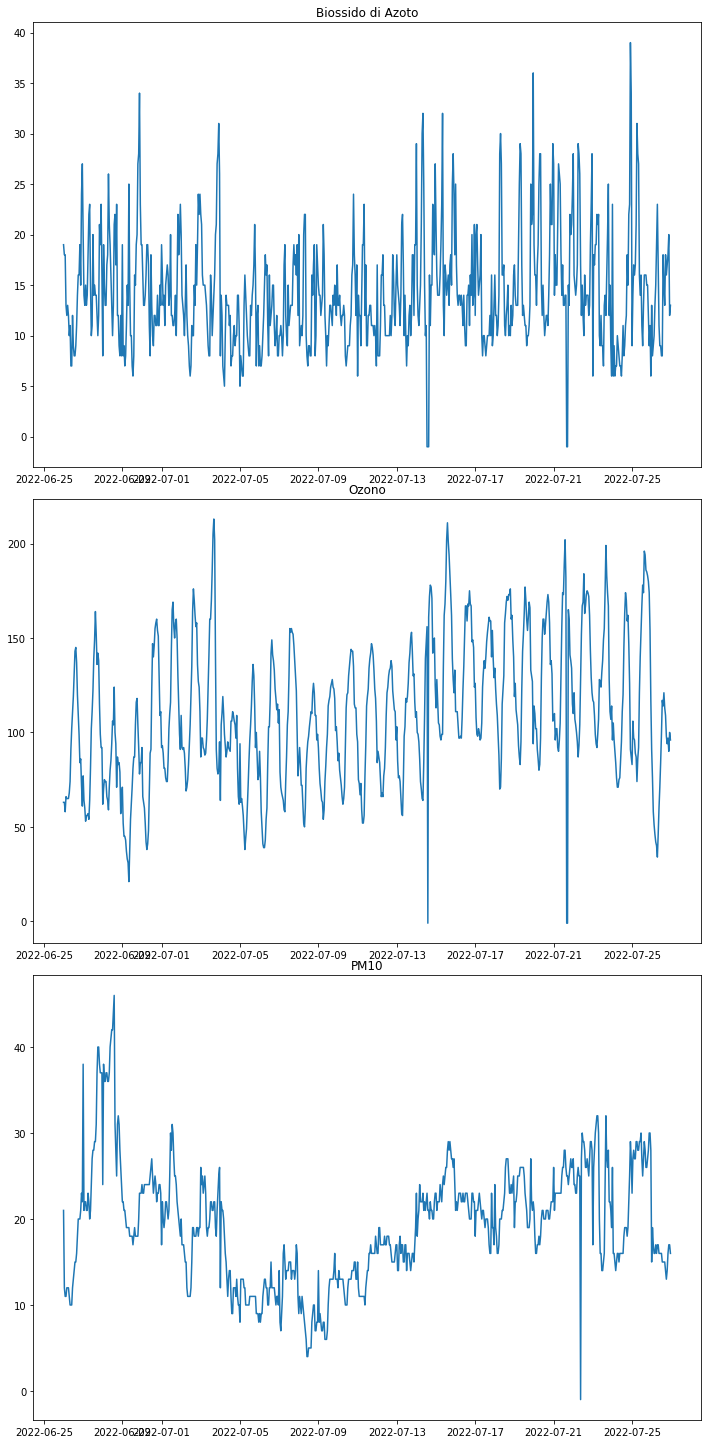

Stazione A22 (Avio)


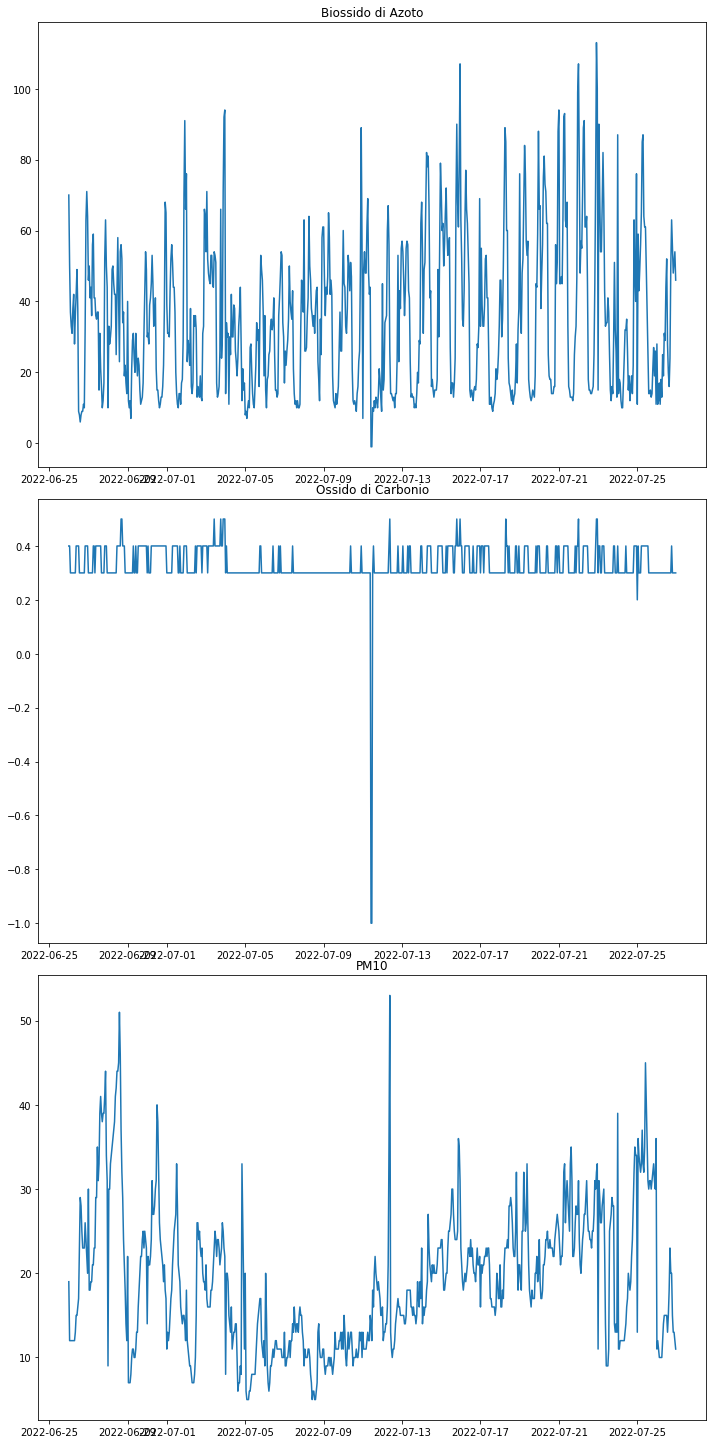

Stazione Monte Gaza


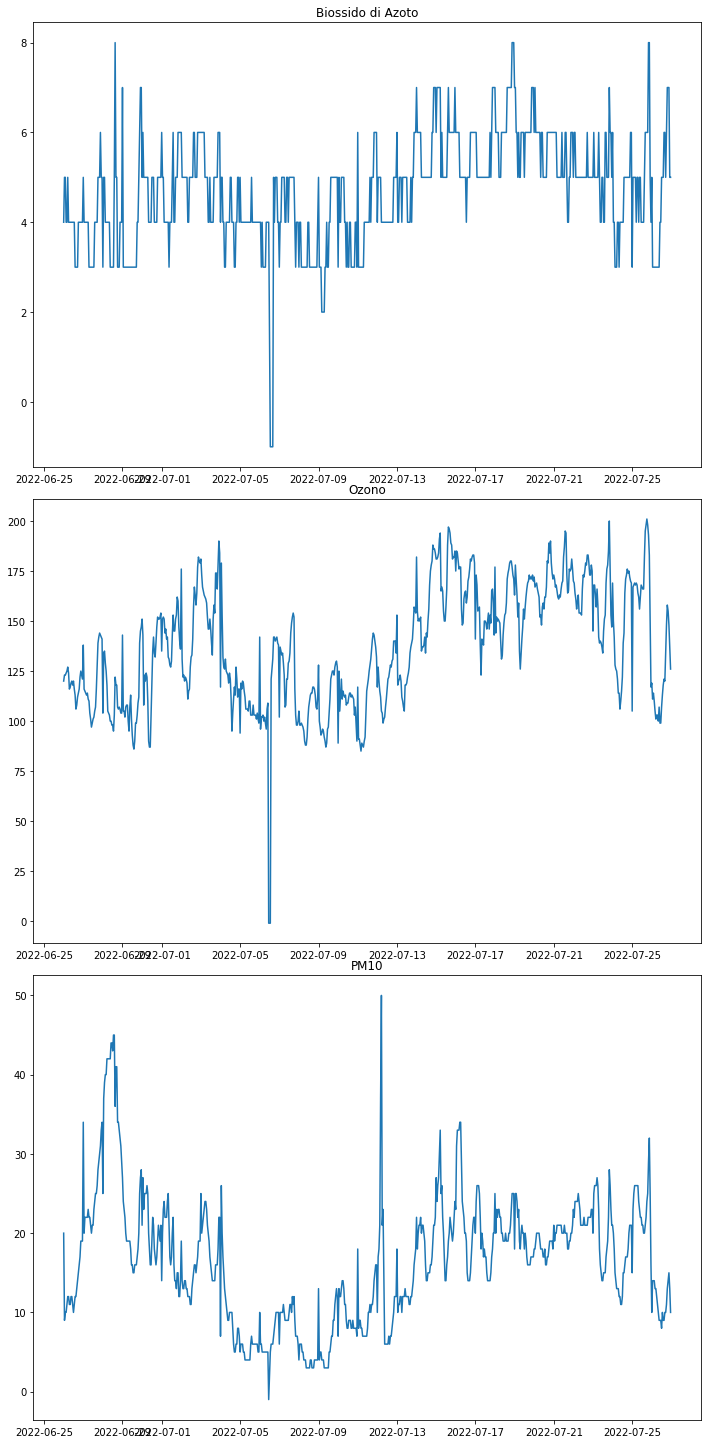

In [76]:
for name, station in station_data.items():
    pollutants = station.columns
    if len(pollutants) == 0: continue
    # create a grid of n_pollutants_rows by 1
    figure, axis = plt.subplots(len(pollutants), 1, figsize=(10,20))
    print(f"Stazione {name}")
    figure.tight_layout()
    
    for i, pollutant in enumerate(pollutants):
        axis[i].plot(
            station.index,     # x axis
            station[pollutant] # y axis
        )
        axis[i].set_title(pollutant)
    plt.show()